<a href="https://colab.research.google.com/github/sirigowda204/House-Pricing-Prediction-Bangalore/blob/main/Housing_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting House Prices in Bangalore

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


To check the number of Nan values in the Dataset

In [ ]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df['location'].value_counts()

Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
Raja Rajashweri Nagar          1
Bull Temple Road               1
RMC YARD                       1
Electronic city phase 1,       1
Shanthi Pura                   1
Name: location, Length: 1305, dtype: int64

Filling the NaN values with mode

In [ ]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [ ]:
df['location'].value_counts()

Whitefield                   541
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
Raja Rajashweri Nagar          1
Bull Temple Road               1
RMC YARD                       1
Electronic city phase 1,       1
Shanthi Pura                   1
Name: location, Length: 1305, dtype: int64

Removing 'BHK', 'Bedroom' from the 'Size' Column inorder to just keep the number

In [ ]:
df['size']= df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.0,51.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  int64  
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 936.7+ KB


In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,area_type,availability,location,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,GrrvaGr,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,GrrvaGr,1200


Converting the 'total_sqft' column to float data type

In [ ]:
def convert_sqft(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)


In [ ]:
print(df['total_sqft'])

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00


#Finding the correlation between columns of the dataset

In [ ]:
df.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.347455,0.895786,0.194358,0.398074
total_sqft,0.347455,1.000000,0.389223,0.154499,0.575559
bath,0.895786,0.389223,1.000000,0.207970,0.454449
balcony,0.194358,0.154499,0.207970,1.000000,0.124951
price,0.398074,0.575559,0.454449,0.124951,1.000000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["area_type"] = ord_enc.fit_transform(df[["area_type"]])

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3.0,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,2.0,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,0.0,Ready To Move,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00
3,3.0,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,3.0,Ready To Move,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00


In [ ]:
df.corr()

,area_type,size,total_sqft,bath,balcony,price
area_type,1.000000,-0.122118,-0.050407,-0.101768,0.091440,-0.057359
size,-0.122118,1.000000,0.347455,0.895786,0.194358,0.398074
total_sqft,-0.050407,0.347455,1.000000,0.389223,0.154499,0.575559
bath,-0.101768,0.895786,0.389223,1.000000,0.207970,0.454449
balcony,0.091440,0.194358,0.154499,0.207970,1.000000,0.124951
price,-0.057359,0.398074,0.575559,0.454449,0.124951,1.000000


We can see that 'area_type' and 'balcony' columns have very little effect on the 'price'

In [ ]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df[df['size'] > 20]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,3.0,Ready To Move,2Electronic City Phase II,27,GrrvaGr,8000.0,27.0,0.0,230.0
4684,2.0,Ready To Move,Munnekollal,43,GrrvaGr,2400.0,40.0,0.0,660.0


Checking for any unusual data

In [ ]:
options = [i for i in range(830)]
df.loc[(df['size'] > 2) &
              df['total_sqft'].isin(options)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
45,2.0,Ready To Move,HSR Layout,8,GrrvaGr,600.0,9.0,2.0,200.00
70,2.0,Ready To Move,Double Road,3,GrrvaGr,500.0,3.0,2.0,100.00
89,2.0,Ready To Move,Rajaji Nagar,6,GrrvaGr,710.0,6.0,3.0,160.00
176,2.0,Ready To Move,Kumaraswami Layout,5,GrrvaGr,600.0,3.0,2.0,85.00
349,2.0,18-Dec,Suragajakkanahalli,3,PrhyaK,11.0,3.0,2.0,74.00
...,...,...,...,...,...,...,...,...,...
13052,2.0,Ready To Move,8th Phase JP Nagar,4,GrrvaGr,600.0,5.0,2.0,99.00
13063,2.0,Ready To Move,Vidyaranyapura,4,GrrvaGr,770.0,3.0,2.0,65.25
13073,2.0,Ready To Move,Nagarbhavi,4,GrrvaGr,600.0,3.0,2.0,100.00
13112,2.0,Ready To Move,Nagavara,3,GrrvaGr,440.0,3.0,1.0,35.00


In [ ]:
df=df.drop(['area_type'],axis=1)

In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Ready To Move,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00


In [ ]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Jan               1
15-Aug               1
17-Jan               1
15-Jun               1
Name: availability, Length: 81, dtype: int64

In [ ]:
df["availability"] = ord_enc.fit_transform(df[["availability"]])

In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price
0,40.0,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,80.0,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,80.0,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00
3,80.0,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,80.0,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00


We can see that the 'availability' column does not influence the 'price' much, hence we drop it

In [ ]:
df.corr()

,availability,size,total_sqft,bath,balcony,price
availability,1.000000,0.085729,0.014647,0.064487,0.102712,0.031089
size,0.085729,1.000000,0.347455,0.895786,0.194358,0.398074
total_sqft,0.014647,0.347455,1.000000,0.389223,0.154499,0.575559
bath,0.064487,0.895786,0.389223,1.000000,0.207970,0.454449
balcony,0.102712,0.194358,0.154499,0.207970,1.000000,0.124951
price,0.031089,0.398074,0.575559,0.454449,0.124951,1.000000


In [ ]:
df=df.drop(['availability'],axis=1)

In [ ]:
df.head()

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00


In [ ]:
df1 = df.copy()

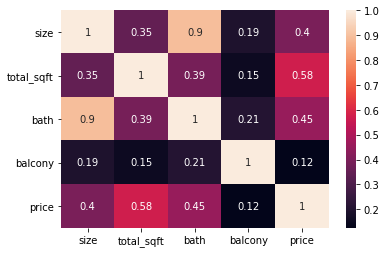

In [ ]:
sns.heatmap(df1.corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


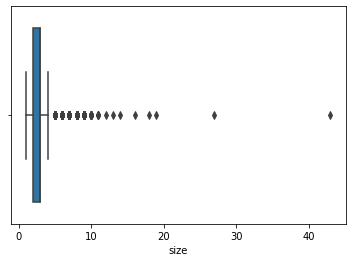

In [ ]:
sns.boxplot('size', data = df, orient = 'vertical')

In [ ]:
df[df['size'] > 5]

,location,size,society,total_sqft,bath,balcony,price
9,Gandhi Bazar,6,GrrvaGr,1020.0,6.0,2.0,370.0
45,HSR Layout,8,GrrvaGr,600.0,9.0,2.0,200.0
58,Murugeshpalya,6,GrrvaGr,1407.0,4.0,1.0,150.0
64,Bommanahalli,8,GrrvaGr,3000.0,8.0,0.0,140.0
68,Devarachikkanahalli,8,GrrvaGr,1350.0,7.0,0.0,85.0
...,...,...,...,...,...,...,...
13221,T Dasarahalli,9,GrrvaGr,1178.0,9.0,1.0,75.0
13226,Raja Rajeshwari Nagar,8,GrrvaGr,6000.0,8.0,3.0,215.0
13277,Kundalahalli Colony,7,GrrvaGr,1400.0,7.0,2.0,218.0
13279,Vishwanatha Nagenahalli,6,GrrvaGr,1200.0,5.0,2.0,130.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


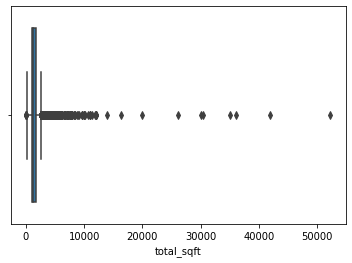

In [ ]:
sns.boxplot('total_sqft', data = df, orient = 'vertical')

In [ ]:
max_threshold = df[["bath","size","total_sqft", "price"]].quantile(0.95)
max_threshold

bath             5.0
size             5.0
total_sqft    3250.0
price          324.0
Name: 0.95, dtype: float64

In [ ]:
df[df['total_sqft'] < 670.65]

,location,size,society,total_sqft,bath,balcony,price
20,Kengeri,1,GrrvaGr,600.0,1.0,1.0,15.00
24,Thanisandra,1,Bhe 2ko,510.0,1.0,0.0,25.25
26,Electronic City,2,Itelaa,660.0,1.0,1.0,23.10
42,Ganga Nagar,1,Ceove G,600.0,1.0,0.0,38.00
43,Yelahanka,1,GrrvaGr,660.0,1.0,0.0,48.00
...,...,...,...,...,...,...,...
13220,Attibele,1,Jae 1hu,520.0,1.0,1.0,15.00
13224,Chandapura,1,SuVue S,520.0,1.0,1.0,14.04
13273,Raja Rajeshwari Nagar,1,GrrvaGr,510.0,1.0,1.0,22.00
13305,Hulimavu,1,GrrvaGr,500.0,1.0,3.0,220.00


Removing the outliers as seen on the Boxplot and Heatmap

In [ ]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,GrrvaGr,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,GrrvaGr,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5,ArsiaEx,3453.0,4.0,0.0,231.00,6689.834926
13316,Richards Town,4,GrrvaGr,3600.0,5.0,2.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,Mahla T,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4,SollyCl,4689.0,4.0,1.0,488.00,10407.336319


In [ ]:
max_threshold = df[["bath","size","total_sqft", "price","price_per_sqft"]].quantile(0.95)
max_threshold

bath                  5.000000
size                  5.000000
total_sqft         3250.000000
price               324.000000
price_per_sqft    15293.303348
Name: 0.95, dtype: float64

In [ ]:
df = df.drop(df[df['size'] > 5].index)
df = df.drop(df[df['bath'] > 5].index)
df = df.drop(df[df['total_sqft'] > 3417.0].index)
df = df.drop(df[df['price'] > 325.0].index)
df = df.drop(df[df['price_per_sqft'] > 15293.0].index)

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(8017, 8)

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices , axis = 'index')   

df = remove_bhk_outliers(df)
df.shape

(6485, 8)

In [ ]:
df[((df['size']*350+df['bath']*40)>df['total_sqft'])] 

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
60,2nd Stage Nagarbhavi,4,GrrvaGr,1500.0,4.0,2.0,220.000,14666.666667
61,2nd Stage Nagarbhavi,4,GrrvaGr,1350.0,4.0,1.0,200.000,14814.814815
62,2nd Stage Nagarbhavi,4,GrrvaGr,600.0,3.0,1.0,84.000,14000.000000
63,2nd Stage Nagarbhavi,4,GrrvaGr,600.0,3.0,2.0,82.000,13666.666667
64,3rd Block Banashankari,4,GrrvaGr,1200.0,4.0,1.0,175.000,14583.333333
...,...,...,...,...,...,...,...,...
7908,Yelahanka New Town,2,GrrvaGr,550.0,2.0,1.0,26.000,4727.272727
7912,Yelahanka New Town,1,KHatsFl,350.0,1.0,1.0,13.500,3857.142857
7926,Yelahanka New Town,1,KHatsFl,284.0,1.0,1.0,8.000,2816.901408
7934,Yelahanka New Town,3,GrrvaGr,1000.0,2.0,1.0,48.000,4800.000000


We have considered the minimum value of a single room and a bathroom to be 350sqft and 40sqft respectively 

In [ ]:
df = df.drop(df[(df['size']*350+df['bath']*40)>df['total_sqft']].index)

In [ ]:
df.head(100)

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Devarabeesana Halli,3,Sorisa,1672.0,3.0,2.0,150.0,8971.291866
1,Devarabeesana Halli,3,Sorisa,1750.0,3.0,3.0,149.0,8514.285714
2,Devarabeesana Halli,3,Sorisa,1750.0,3.0,2.0,150.0,8571.428571
4,Devarachikkanahalli,2,Clntsrt,1250.0,2.0,2.0,40.0,3200.000000
5,Devarachikkanahalli,2,GrrvaGr,1200.0,2.0,2.0,83.0,6916.666667
...,...,...,...,...,...,...,...,...
107,5th Phase JP Nagar,2,Maodser,1080.0,2.0,1.0,53.0,4907.407407
108,5th Phase JP Nagar,2,Mangsr,1041.0,2.0,2.0,54.0,5187.319885
109,5th Phase JP Nagar,2,GrrvaGr,812.0,2.0,1.0,42.0,5172.413793
110,5th Phase JP Nagar,2,Rewelav,1010.0,2.0,2.0,57.0,5643.564356


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


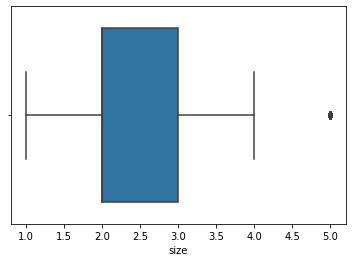

In [ ]:
sns.boxplot('size', data = df, orient = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


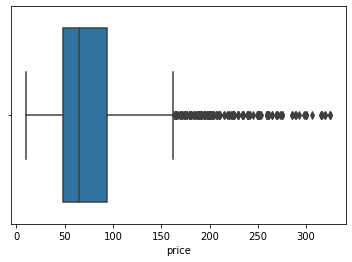

In [ ]:
sns.boxplot('price', data = df, orient = 'vertical')

In [ ]:
df[df['price'] > 324]

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
65,3rd Block Banashankari,5,GrrvaGr,2400.0,4.0,1.0,325.0,13541.666667
2427,Frazer Town,4,GrrvaGr,2900.0,4.0,2.0,325.0,11206.896552
5003,Malleshwaram,4,GaityEt,2500.0,5.0,2.0,325.0,13000.000000


In [ ]:
max_threshold = df[["bath","size","total_sqft", "price"]].quantile(0.95)
max_threshold

bath             4.0
size             3.0
total_sqft    2316.5
price          160.0
Name: 0.95, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


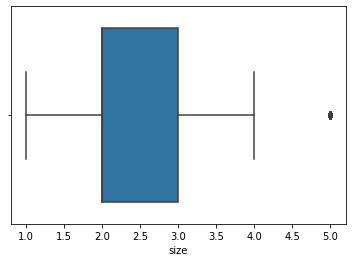

In [ ]:
sns.boxplot('size', data = df, orient = 'vertical')

In [ ]:
df.shape

(6231, 8)

In [ ]:
df.corr()

,size,total_sqft,bath,balcony,price,price_per_sqft
size,1.000000,0.824227,0.833644,0.301324,0.664736,0.286116
total_sqft,0.824227,1.000000,0.816296,0.302080,0.847680,0.387595
bath,0.833644,0.816296,1.000000,0.298241,0.692745,0.320083
balcony,0.301324,0.302080,0.298241,1.000000,0.222563,0.063732
price,0.664736,0.847680,0.692745,0.222563,1.000000,0.783890
price_per_sqft,0.286116,0.387595,0.320083,0.063732,0.783890,1.000000


In [ ]:
df[df['total_sqft'] < 400]

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
627,Attibele,1,Jae 1hu,395.0,1.0,1.0,10.25,2594.936709


In [ ]:
df.shape

(6231, 8)

In [ ]:
df['society'].value_counts()

GrrvaGr    2041
Prtates      44
Bhmesy       41
GMown E      37
PrarePa      37
           ... 
PaanaCh       1
Eline P       1
PSmalsh       1
MBireap       1
Bhide P       1
Name: society, Length: 1620, dtype: int64

In [ ]:
df.head()

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Devarabeesana Halli,3,Sorisa,1672.0,3.0,2.0,150.0,8971.291866
1,Devarabeesana Halli,3,Sorisa,1750.0,3.0,3.0,149.0,8514.285714
2,Devarabeesana Halli,3,Sorisa,1750.0,3.0,2.0,150.0,8571.428571
4,Devarachikkanahalli,2,Clntsrt,1250.0,2.0,2.0,40.0,3200.000000
5,Devarachikkanahalli,2,GrrvaGr,1200.0,2.0,2.0,83.0,6916.666667


In [ ]:
df['location'].value_counts()

Whitefield                  172
Sarjapur  Road              149
Raja Rajeshwari Nagar       124
Uttarahalli                 119
Haralur Road                112
                           ... 
BEL Road                      1
Narayana Nagar 1st Block      1
Ullal Road                    1
Gulimangala                   1
Kadugondanahalli              1
Name: location, Length: 598, dtype: int64

In [ ]:
df['price'].max()

325.0

In [ ]:
df[df['price']==df['price'].max()]

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
65,3rd Block Banashankari,5,GrrvaGr,2400.0,4.0,1.0,325.0,13541.666667
2427,Frazer Town,4,GrrvaGr,2900.0,4.0,2.0,325.0,11206.896552
5003,Malleshwaram,4,GaityEt,2500.0,5.0,2.0,325.0,13000.000000


In [ ]:
df[(df['price']>1000) & (df['total_sqft'] < 4000)]

,location,size,society,total_sqft,bath,balcony,price,price_per_sqft


In [ ]:
df=df.drop(['society'],axis=1)

In [ ]:
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Devarabeesana Halli,3,1672.0,3.0,2.0,150.0,8971.291866
1,Devarabeesana Halli,3,1750.0,3.0,3.0,149.0,8514.285714
2,Devarabeesana Halli,3,1750.0,3.0,2.0,150.0,8571.428571
4,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000
5,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667


In [ ]:
df.shape

(6231, 7)

In [ ]:
df=df.drop(['balcony'],axis=1)

In [ ]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Devarabeesana Halli,3,1672.0,3.0,150.0,8971.291866
1,Devarabeesana Halli,3,1750.0,3.0,149.0,8514.285714
2,Devarabeesana Halli,3,1750.0,3.0,150.0,8571.428571
4,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
5,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667


In [ ]:
df.location

0        Devarabeesana Halli
1        Devarabeesana Halli
2        Devarabeesana Halli
4        Devarachikkanahalli
5        Devarachikkanahalli
                ...         
8011            Yeshwanthpur
8013            manyata park
8014                tc.palya
8015                tc.palya
8016                tc.palya
Name: location, Length: 6231, dtype: object

In [ ]:
df[df['price']>2000]

,location,size,total_sqft,bath,price,price_per_sqft


In [ ]:
df.corr()

,size,total_sqft,bath,price,price_per_sqft
size,1.000000,0.824227,0.833644,0.664736,0.286116
total_sqft,0.824227,1.000000,0.816296,0.847680,0.387595
bath,0.833644,0.816296,1.000000,0.692745,0.320083
price,0.664736,0.847680,0.692745,1.000000,0.783890
price_per_sqft,0.286116,0.387595,0.320083,0.783890,1.000000


In [ ]:
df.shape

(6231, 6)

In [ ]:
df.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Devarabeesana Halli,3,1672.0,3.0,150.0,8971.291866
1,Devarabeesana Halli,3,1750.0,3.0,149.0,8514.285714
2,Devarabeesana Halli,3,1750.0,3.0,150.0,8571.428571
4,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
5,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
6,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
7,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
8,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
9,Devarachikkanahalli,2,1130.0,2.0,36.0,3185.840708
10,Devarachikkanahalli,3,1417.0,2.0,76.0,5363.443896


In [ ]:
df['location'].agg('count')

6231

In [ ]:
len(df.location)

6231

Locations less that 10 data points are grouped under a new name 'other'

In [ ]:
df.location = df.location.apply(lambda x : x.strip())
location_stats = df.groupby('location')['location'].agg('count')
location_stats

location
1st Block BEL Layout      1
1st Block HRBR Layout     2
1st Block Jayanagar       4
1st Block Koramangala     4
1st Phase JP Nagar       13
                         ..
Yelenahalli               8
Yemlur                    2
Yeshwanthpur             33
manyata park              1
tc.palya                  3
Name: location, Length: 597, dtype: int64

In [ ]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               172
Sarjapur  Road           149
Raja Rajeshwari Nagar    124
Uttarahalli              119
Haralur Road             112
                        ... 
Omarbagh Layout            1
Byrathi Village            1
Brindavan Layout           1
Raghavendra Layout         1
1st Block BEL Layout       1
Name: location, Length: 597, dtype: int64

In [ ]:
len(location_stats[location_stats<=10])

439

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [ ]:
df.location = df.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [ ]:
len(df.location.unique())

159

In [ ]:
df.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,other,3,1672.0,3.0,150.0,8971.291866
1,other,3,1750.0,3.0,149.0,8514.285714
2,other,3,1750.0,3.0,150.0,8571.428571
4,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
5,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
6,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
7,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
8,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699
9,Devarachikkanahalli,2,1130.0,2.0,36.0,3185.840708
10,Devarachikkanahalli,3,1417.0,2.0,76.0,5363.443896


In [ ]:
df[df['location'] == 'other']

,location,size,total_sqft,bath,price,price_per_sqft
0,other,3,1672.0,3.0,150.00,8971.291866
1,other,3,1750.0,3.0,149.00,8514.285714
2,other,3,1750.0,3.0,150.00,8571.428571
16,other,3,1450.0,2.0,70.00,4827.586207
17,other,1,700.0,1.0,25.50,3642.857143
...,...,...,...,...,...,...
7946,other,2,1210.0,2.0,60.00,4958.677686
8013,other,3,1780.0,3.0,84.83,4765.730337
8014,other,2,880.0,2.0,48.00,5454.545455
8015,other,2,1000.0,2.0,55.00,5500.000000


In [ ]:
df['location'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     other
1                     other
2                     other
4       Devarachikkanahalli
5       Devarachikkanahalli
               ...         
8011           Yeshwanthpur
8013                  other
8014                  other
8015                  other
8016                  other
Name: location, Length: 6231, dtype: object>

In [ ]:
df = df.drop(['price_per_sqft'] , axis = 'columns')

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#ord_enc = OrdinalEncoder()
#df["location"] = ord_enc.fit_transform(df[["location"]])
#df['location'].head(11)

OneHotEncoding the 'location' 

In [ ]:
dummies = pd.get_dummies(df.location)
dummies.head(30)

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikkalasandra,Choodasandra,...,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Poorna Pragna Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df.head()

,location,size,total_sqft,bath,price,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,...,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Poorna Pragna Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,other,3,1672.0,3.0,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,other,3,1750.0,3.0,149.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,other,3,1750.0,3.0,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,2,1250.0,2.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,1200.0,2.0,83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['location'] , axis = 'columns')

In [ ]:
df = df.reset_index()

#Random Forest Regression 

In [ ]:
X = df.drop('price' , axis = 'columns')
y = df.price

Splitting the dataset

In [ ]:
print(X)

      index  size  total_sqft  ...  Yelahanka  Yelahanka New Town  Yeshwanthpur
0         0     3      1672.0  ...          0                   0             0
1         1     3      1750.0  ...          0                   0             0
2         2     3      1750.0  ...          0                   0             0
3         4     2      1250.0  ...          0                   0             0
4         5     2      1200.0  ...          0                   0             0
...     ...   ...         ...  ...        ...                 ...           ...
6226   8011     3      1855.0  ...          0                   0             1
6227   8013     3      1780.0  ...          0                   0             0
6228   8014     2       880.0  ...          0                   0             0
6229   8015     2      1000.0  ...          0                   0             0
6230   8016     3      1400.0  ...          0                   0             0

[6231 rows x 162 columns]


In [ ]:
#print(X[:,0])

In [ ]:
print(y)

0       150.00
1       149.00
2       150.00
3        40.00
4        83.00
         ...  
6226    135.00
6227     84.83
6228     48.00
6229     55.00
6230     78.00
Name: price, Length: 6231, dtype: float64


Splitting further into test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

In [ ]:
print(X_train)

      index  size  total_sqft  ...  Yelahanka  Yelahanka New Town  Yeshwanthpur
3942   4960     2      1120.0  ...          0                   0             0
1503   1847     2      1160.0  ...          0                   0             0
3288   4060     2       870.0  ...          0                   0             0
150     168     2      1000.0  ...          0                   0             0
3100   3831     2      1096.0  ...          0                   0             0
...     ...   ...         ...  ...        ...                 ...           ...
3772   4770     2      1027.0  ...          0                   0             0
5191   6484     2      1121.0  ...          0                   0             0
5226   6527     2      1375.0  ...          0                   0             0
5390   6736     3      1564.0  ...          0                   0             0
860    1015     3      1440.0  ...          0                   0             0

[4154 rows x 162 columns]


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.45775529 -0.52784405 -0.51123767 ... -0.11795177 -0.06218201
  -0.06778585]
 [-0.91075856 -0.52784405 -0.4241048  ... -0.11795177 -0.06218201
  -0.06778585]
 [ 0.062104   -0.52784405 -1.05581808 ... -0.11795177 -0.06218201
  -0.06778585]
 ...
 [ 1.14662815 -0.52784405  0.04423436 ... -0.11795177 -0.06218201
  -0.06778585]
 [ 1.23850717  0.93295821  0.45593715 ... -0.11795177 -0.06218201
  -0.06778585]
 [-1.2765162   0.93295821  0.18582526 ... -0.11795177 -0.06218201
  -0.06778585]]


In [ ]:
np.any(np.isnan(X_train))

False

Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)
print(y_test)

[ 80.728 135.5    85.465 ...  41.099  82.847  53.362]
5077     74.03
2410    115.00
3520     68.00
230      37.00
378     119.00
         ...  
4556     43.00
4418     39.70
1598     40.40
4546    125.00
4694     67.00
Name: price, Length: 2077, dtype: float64


#Accuracy Score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7853550816026313

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 0)
cross_val_score(RandomForestRegressor(n_estimators = 10, random_state = 0) , X , y , cv=cv).mean()

0.7932262063358817

In [ ]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha= 1, fit_intercept = True, normalize = False)
regressor.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7984905617730964

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 0)
cross_val_score(Ridge(alpha= 1, fit_intercept = True, normalize = False, tol = 0.0001) , X , y , cv=cv).mean()

0.8104991712024996

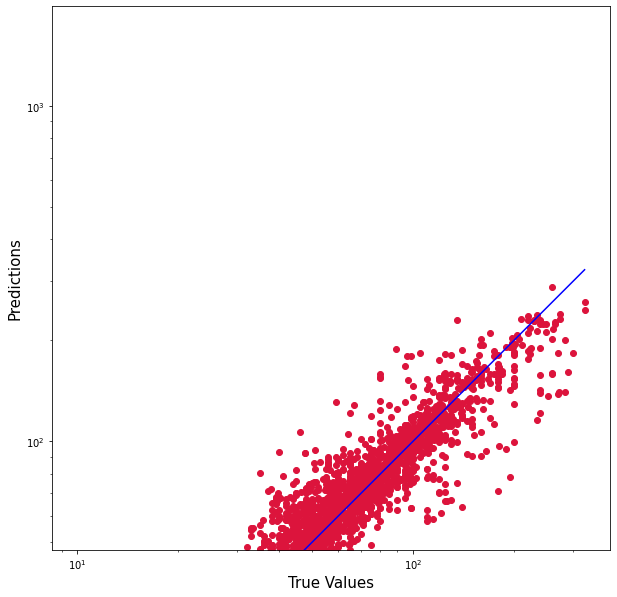

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Our Model has achieved a score of 81.05%